<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Objective" data-toc-modified-id="Objective-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Objective</a></span></li><li><span><a href="#Data-Extraction" data-toc-modified-id="Data-Extraction-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Extraction</a></span></li><li><span><a href="#EDA" data-toc-modified-id="EDA-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>EDA</a></span></li><li><span><a href="#Data-Preprocessing" data-toc-modified-id="Data-Preprocessing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data Preprocessing</a></span></li><li><span><a href="#Modelling" data-toc-modified-id="Modelling-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Modelling</a></span><ul class="toc-item"><li><span><a href="#CountVectorizer" data-toc-modified-id="CountVectorizer-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>CountVectorizer</a></span><ul class="toc-item"><li><span><a href="#Train-Test-Split" data-toc-modified-id="Train-Test-Split-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Train Test Split</a></span></li><li><span><a href="#LSA" data-toc-modified-id="LSA-5.1.2"><span class="toc-item-num">5.1.2&nbsp;&nbsp;</span>LSA</a></span></li><li><span><a href="#Training-the-Model" data-toc-modified-id="Training-the-Model-5.1.3"><span class="toc-item-num">5.1.3&nbsp;&nbsp;</span>Training the Model</a></span></li><li><span><a href="#Evaluation" data-toc-modified-id="Evaluation-5.1.4"><span class="toc-item-num">5.1.4&nbsp;&nbsp;</span>Evaluation</a></span></li><li><span><a href="#Check-most-important-words" data-toc-modified-id="Check-most-important-words-5.1.5"><span class="toc-item-num">5.1.5&nbsp;&nbsp;</span>Check most important words</a></span></li></ul></li><li><span><a href="#TFIDF" data-toc-modified-id="TFIDF-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>TFIDF</a></span><ul class="toc-item"><li><span><a href="#Modelling" data-toc-modified-id="Modelling-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>Modelling</a></span></li></ul></li><li><span><a href="#BERT" data-toc-modified-id="BERT-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>BERT</a></span></li></ul></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

# Objective

The objective of this project is to create a Fake News Detector by using NLP. The model will be trained on a kaggle dataset which already contains news articles that are identified are real and fake. These articles refer to the US elections of 2016. The model will then be evaluated on data that will be scraped from Politifact, with news about the US elections of 2020.

# Data Extraction

In [2]:
fake = pd.read_csv(r'C:\Users\Tiago McDonald\Downloads\Fake.csv')
real = pd.read_csv(r'C:\Users\Tiago McDonald\Downloads\True.csv')

In [3]:
fake

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [4]:
real

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


**Initial Observations**

Both datasets have the same columns: title, text, subject and date.

The date column won't be needed because we want to predict wether it's fake or not based on what is in the text.

In [5]:
# Add False and True columns on both datasets

fake['target'] = 1
real['target'] = 0

# Append both datasets

news = pd.concat([fake, real]).reset_index(drop = True)

In [6]:
# Shuffle the news dataset to avoid bias
from sklearn.utils import shuffle
news = shuffle(news)
news = news.reset_index(drop=True)

# EDA

In [7]:
news[news.duplicated(keep=False)].sort_values('title')

,title,text,subject,date,target
44132,'Nuclear option' fallout? More extreme U.S. ju...,WASHINGTON (Reuters) - A Republican-backed Sen...,politicsNews,"April 6, 2017",0
16518,'Nuclear option' fallout? More extreme U.S. ju...,WASHINGTON (Reuters) - A Republican-backed Sen...,politicsNews,"April 6, 2017",0
28229,"After U.S. veto, U.N. General Assembly to meet...",UNITED NATIONS (Reuters) - The 193-member Unit...,worldnews,"December 19, 2017",0
2704,"After U.S. veto, U.N. General Assembly to meet...",UNITED NATIONS (Reuters) - The 193-member Unit...,worldnews,"December 19, 2017",0
14345,Another U.S. appeals court refuses to revive T...,SAN FRANCISCO/WASHINGTON (Reuters) - President...,politicsNews,"June 12, 2017",0
...,...,...,...,...,...
7640,"White, moldy and French: Russia's response to ...","VERKHNAYA PYSHMA/YEKATERINBURG, Russia (Reuter...",worldnews,"December 21, 2017",0
22110,Zimbabwe's Mnangagwa promises zero tolerance i...,HARARE (Reuters) - Zimbabwean President Emmers...,worldnews,"December 20, 2017",0
18900,Zimbabwe's Mnangagwa promises zero tolerance i...,HARARE (Reuters) - Zimbabwean President Emmers...,worldnews,"December 20, 2017",0
39459,[VIDEO] #BlackLivesMatter Terrorists Storm Dar...,They were probably just looking for a safe sp...,politics,"Nov 16, 2015",1


In [8]:
news.duplicated().sum()

209

We have 209 duplicates which will need to be dropped

In [9]:
news.drop_duplicates(inplace=True)

In [10]:
news.target.value_counts(normalize=True)

1    0.525364
0    0.474636
Name: target, dtype: float64

We can see that 52.5% of the articles are labeled as Fake and 47.5% are labeled as real news. So we have a balanced dataset

In [11]:
news['year']= news.date.map(lambda x: x.split(', ')[1] if len(x.split(', ')) > 1 else 'NaN')

In [12]:
news[news.year=='NaN']

,title,text,subject,date,target,year
539,MSNBC ANCHOR Flabbergasted at What Texas Teach...,If we protect every other government building ...,politics,19-Feb-18,1,NaN
1214,https://100percentfedup.com/video-hillary-aske...,https://100percentfedup.com/video-hillary-aske...,politics,https://100percentfedup.com/video-hillary-aske...,1,NaN
4190,"WHAT’S WRONG WITH PELOSI? Nancy Stutters, Stam...",What s wrong with Pelosi? Nancy Pelosi is supp...,politics,15-Feb-18,1,NaN
5939,“THE TRUMP CURSE IS REAL”…Social Media Respond...,Two months before the Winter Olympics in Seoul...,politics,17-Feb-18,1,NaN
9184,BROTHER OF HERO COACH Breaks Down Over Tribute...,The hero football coach who threw himself betw...,politics,17-Feb-18,1,NaN
10940,BREAKING: FL GOV RICK SCOTT Calls for FBI Dire...,"While the left points the finger at guns, guns...",politics,16-Feb-18,1,NaN
11071,TUCKER CARLSON Rips The Left On Gun Control Hy...,Tucker Carlson weighed in on the hysteria over...,politics,16-Feb-18,1,NaN
11279,FACEBOOK’S VP Of Ads BLASTS MEDIA: Majority Of...,Facebook s VP of Advertising took to Twitter t...,politics,17-Feb-18,1,NaN
11775,https://100percentfedup.com/served-roy-moore-v...,https://100percentfedup.com/served-roy-moore-v...,politics,https://100percentfedup.com/served-roy-moore-v...,1,NaN
13589,HUH? RAPPER JAY-Z Compares Trayvon Martin to M...,Rapper Jay-Z attended the Peace Walk & Peace T...,politics,15-Feb-18,1,NaN


We can see that the column date is not in the correct format. In some cases, it has a link instead of the date. Another reason why we should drop the column

In [13]:
news.year.unique()

array(['2016', '2017 ', '2015', '2017', '2016 ', 'NaN'], dtype=object)

We can see that we have news articles from 2015 until 2017

Some rows only have the link to the article and not the text of the article itself. We will have to clean the link so that we preserve the title of the article that is inside the link.

In [15]:
news[news.title.str.contains('http')]

,title,text,subject,date,target,year
1214,https://100percentfedup.com/video-hillary-aske...,https://100percentfedup.com/video-hillary-aske...,politics,https://100percentfedup.com/video-hillary-aske...,1,NaN
11775,https://100percentfedup.com/served-roy-moore-v...,https://100percentfedup.com/served-roy-moore-v...,politics,https://100percentfedup.com/served-roy-moore-v...,1,NaN
14336,https://100percentfedup.com/12-yr-old-black-co...,https://100percentfedup.com/12-yr-old-black-co...,politics,https://100percentfedup.com/12-yr-old-black-co...,1,NaN
22257,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,politics,https://fedup.wpengine.com/wp-content/uploads/...,1,NaN
25265,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,left-news,https://fedup.wpengine.com/wp-content/uploads/...,1,NaN
34756,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,left-news,https://fedup.wpengine.com/wp-content/uploads/...,1,NaN
36970,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,Government News,https://fedup.wpengine.com/wp-content/uploads/...,1,NaN
41997,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,Government News,https://fedup.wpengine.com/wp-content/uploads/...,1,NaN
42622,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,politics,https://fedup.wpengine.com/wp-content/uploads/...,1,NaN


Might be better to drop these rows because they contain any text, just the link. And it's only 9 rows which won't have a big impact

In [16]:
real

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",0
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",0
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",0
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",0


We can also see that, for the factual news, every text starts with the city and the publisher. This could also generate bias, so we might need to remove that from the text

In [17]:
news.isna().sum()

title      0
text       0
subject    0
date       0
target     0
year       0
dtype: int64

There are no missing values

In [18]:
news.subject.value_counts()

politicsNews       11220
worldnews           9991
News                9050
politics            6838
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

# Data Preprocessing

There are several steps that should be followed when it comes to preparing data for NLP modelling.

First, some of columns will be dropped because we will only look that the text column.

Second, the text in the text column will have to cleaned and standardized. This involves:

    * Removing punctuation
    * Lowercase the text
    * Remove stop words
    * Tokenize the words
    * Lemmatization of the words

In [19]:
news2 = news.copy()

In [20]:
# Drop the rows with only the link
news2.drop(news2[news2.title.str.contains('http')].index,axis=0, inplace=True)

In [21]:
news2.reset_index(drop=True, inplace=True)

In [22]:
news2 = news2[['text','target']]

In [23]:
# Remove the city and publisher
news2.text = news2.text.map(lambda x: x.split('- ')[1] if len(x.split('- ')) > 1 else x)

In [24]:
# Remove punctuation (code used from https://www.kaggle.com/rodolfoluna/fake-news-detector)
import string

def punctuation_removal(messy_str):
    clean_list = [char for char in messy_str if char not in string.punctuation]
    clean_str = ''.join(clean_list)
    return clean_str

news2['text'] = news2['text'].apply(punctuation_removal)
news2['text'].head()

0    Baton Rouge became the scene of another police...
1    On Friday a cruise ship carrying around 3000 p...
2    A California deputy attorney general has been ...
3    The sweet smell of waffles is familiar in Belg...
4    US Senator John McCain who was diagnosed with ...
Name: text, dtype: object

In [25]:
# Convert to lowercase
news2.text = news2.text.str.lower()

In [26]:
# Removing stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

news2['text'] = news2['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to C:\Users\Tiago
[nltk_data]     McDonald\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
# Tokenize (code adapted from https://github.com/hundredblocks/concrete_NLP_tutorial/blob/master/NLP_notebook.ipynb)
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')

news2["tokens"] = news2["text"].apply(tokenizer.tokenize)
news2.head()

,text,target,tokens
0,baton rouge became scene another police ambush...,1,"[baton, rouge, became, scene, another, police,..."
1,friday cruise ship carrying around 3000 passen...,0,"[friday, cruise, ship, carrying, around, 3000,..."
2,california deputy attorney general charged pos...,0,"[california, deputy, attorney, general, charge..."
3,sweet smell waffles familiar belgium thursday ...,0,"[sweet, smell, waffles, familiar, belgium, thu..."
4,us senator john mccain diagnosed brain cancer ...,0,"[us, senator, john, mccain, diagnosed, brain, ..."


In [28]:
all_words = [word for tokens in news2["tokens"] for word in tokens]
sentence_lengths = [len(tokens) for tokens in news2["tokens"]]
VOCAB = sorted(list(set(all_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))

9470314 words total, with a vocabulary size of 216160


In [29]:
# Lemmatization (code adapted from https://github.com/hundredblocks/concrete_NLP_tutorial/blob/master/NLP_notebook.ipynb)
# Tried to run this but it was taking a long time

# from nltk.stem import WordNetLemmatizer 

# nltk.download('wordnet')

# lemmatizer = WordNetLemmatizer()

# def lemmatize_text(text):
#    return [lemmatizer.lemmatize(w) for w in news2.text]

# news2.text.apply(lemmatize_text)


In [30]:
# Check the most frequent words (code adapted from https://www.kaggle.com/rodolfoluna/fake-news-detector)
def frequency(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = tokenizer.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Frequency", y = "Word", color = 'blue')
    ax.set(ylabel = "Words")
    ax.set(xlabel = "Frequency")
    plt.show()

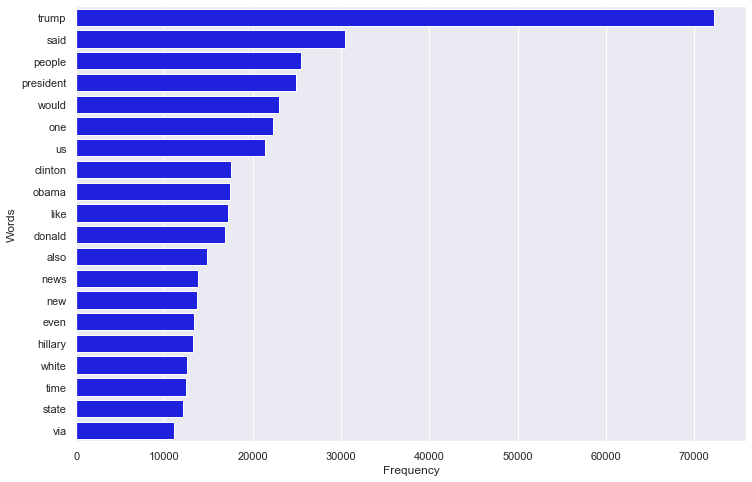

In [31]:
# Most frequent words in fake news
column = news2[news2.target==1]
frequency(column, 'text', 20)

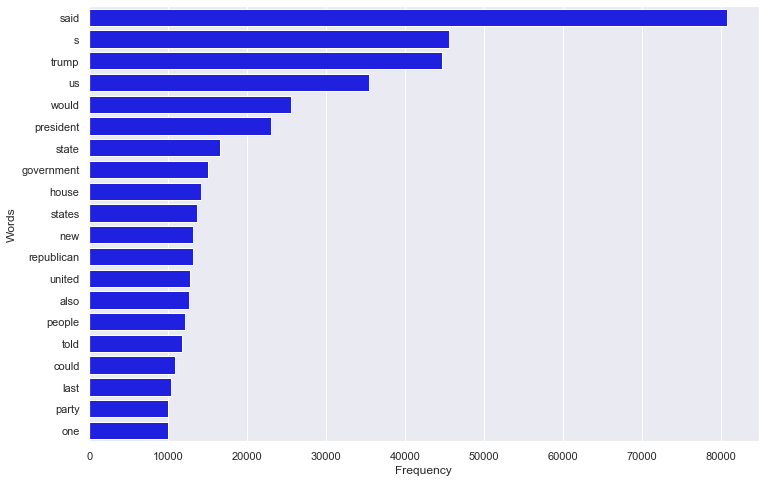

In [32]:
# Most frequent words in factual news
column = news2[news2.target==0]
frequency(column, 'text', 20)

# Modelling

## CountVectorizer

First we are going to start with the Bag of Words method, just by counting the frequency of each word using the **CountVectorizer**, and then applying a Logistic Regression to predict the results.

### Train Test Split

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# code adapted from https://github.com/hundredblocks/concrete_NLP_tutorial/blob/master/NLP_notebook.ipynb

cv = CountVectorizer()

list_corpus = news2["text"].tolist()
list_labels = news2["target"].tolist()

X_train, X_test, y_train, y_test = train_test_split(list_corpus, list_labels, test_size=0.2, random_state=40)

X_train_counts = cv.fit_transform(X_train)
X_test_counts = cv.transform(X_test)

### LSA

We will use LSA (Latent Semantic Analysis) through the function TruncatedSVD to visualize the the dependent variable in 2 dimensions, to check if the values are clearly separated. TruncatedSVD is similar to PCA, but more useful when working with text

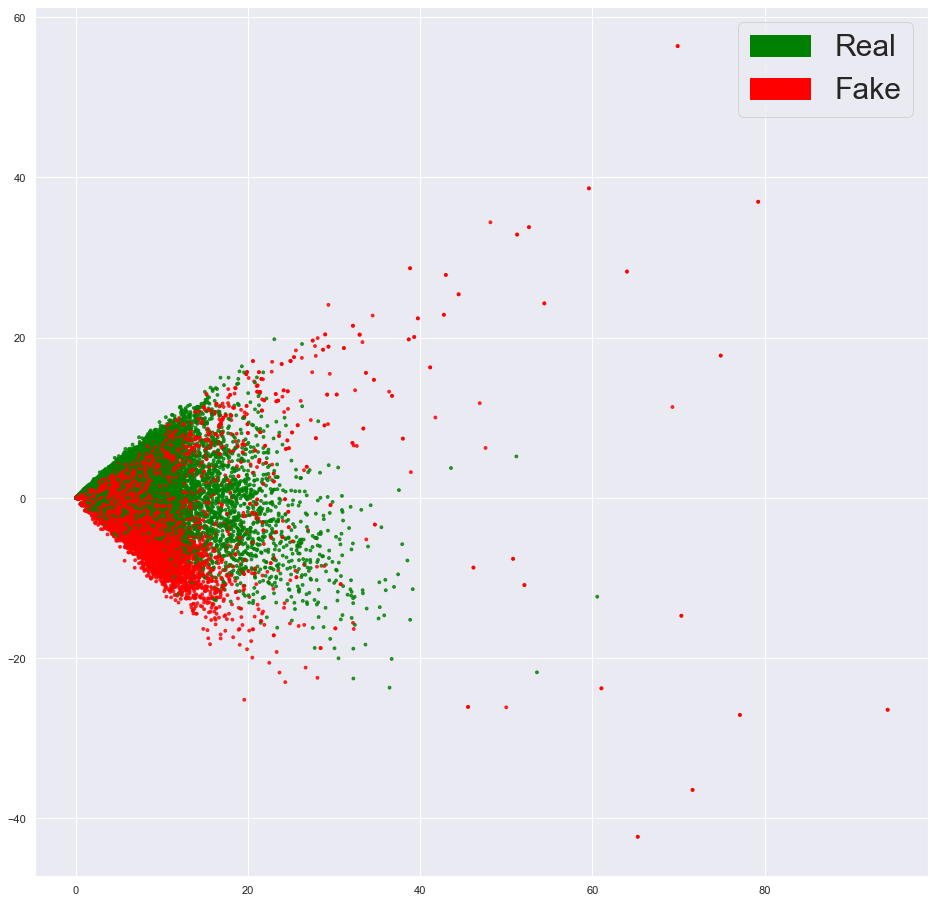

In [34]:
from sklearn.decomposition import TruncatedSVD
import matplotlib
import matplotlib.patches as mpatches

def plot_LSA(test_data, test_labels, plot=True):
        lsa = TruncatedSVD(n_components=2)
        lsa.fit(test_data)
        lsa_scores = lsa.transform(test_data)
        colors = ['green','red']
        plt.scatter(lsa_scores[:,0], lsa_scores[:,1], s=8, alpha=.8, c=test_labels, cmap=matplotlib.colors.ListedColormap(colors))
        green_patch = mpatches.Patch(color='green', label='Real')
        red_patch = mpatches.Patch(color='red', label='Fake')
        plt.legend(handles=[green_patch, red_patch], prop={'size': 30})

fig = plt.figure(figsize=(16, 16))          
plot_LSA(X_train_counts, y_train)
plt.show()
fig.savefig('LSA1.png')

We can see that the two classes are not well distinguished. But we will try the Logistic Regression to check the score

### Training the Model

In [57]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression(C=30, n_jobs=-1, random_state=40) # the c parameter helps avoid overfitting
lg_fit = lg.fit(X_train_counts, y_train)

y_pred_counts = lg.predict(X_test_counts)

### Evaluation

In [58]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

def get_metrics(y_test, y_predicted):
    # true positives / (true positives+false positives)
    precision = precision_score(y_test, y_predicted)             
    # true positives / (true positives + false negatives)
    recall = recall_score(y_test, y_predicted)
    
    # harmonic mean of precision and recall
    f1 = f1_score(y_test, y_predicted)
    
    # true positives + true negatives/ total
    accuracy = accuracy_score(y_test, y_predicted)
    return accuracy, precision, recall, f1

accuracy, precision, recall, f1 = get_metrics(y_test, y_pred_counts)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

accuracy = 0.982, precision = 0.979, recall = 0.986, f1 = 0.983


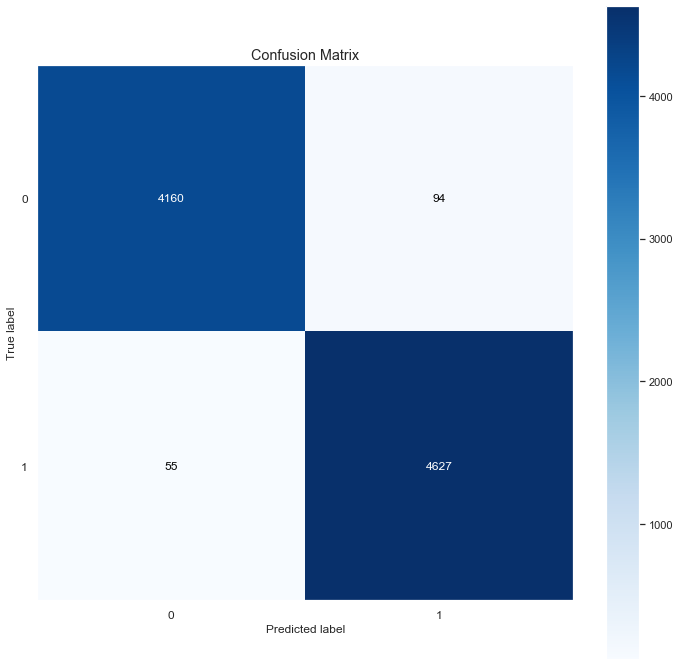

In [37]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(
    y_test, 
    y_pred_counts,
    figsize=(12,12))

plt.savefig('Confusion Matrix1.png')

So we got an accuracy of 98.3%, with 4610 fake news correctly predicted and 4177 real news correctly predicted. However, we still have some FP and FN so we are going to try to improve this model

### Check most important words

In [38]:
def get_most_important_features(vectorizer, model, n=5): # n is the number of words that I want to get by default
    index_to_word = {v:k for k,v in vectorizer.vocabulary_.items()}
    
    # loop for each class
    classes ={}
    for class_index in range(model.coef_.shape[0]): # In the case of Logistic Regression, the range will be 1
        word_importances = [(el, index_to_word[i]) for i,el in enumerate(model.coef_[class_index])]
        sorted_coeff = sorted(word_importances, key = lambda x : x[0], reverse=True)
        tops = sorted(sorted_coeff[:n], key = lambda x : x[0])
        bottom = sorted_coeff[-n:]
        classes[class_index] = {
            'tops':tops,
            'bottom':bottom
        }
    return classes

importance = get_most_important_features(cv, lg, 10)

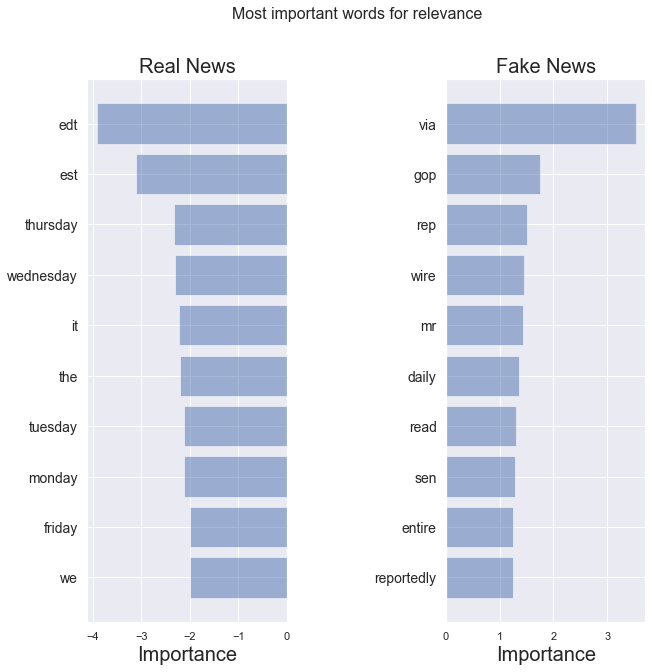

<Figure size 432x288 with 0 Axes>

In [39]:
def plot_important_words(top_scores, top_words, bottom_scores, bottom_words, name):
    y_pos = np.arange(len(top_words))
    top_pairs = [(a,b) for a,b in zip(top_words, top_scores)]
    top_pairs = sorted(top_pairs, key=lambda x: x[1])
    
    bottom_pairs = [(a,b) for a,b in zip(bottom_words, bottom_scores)]
    bottom_pairs = sorted(bottom_pairs, key=lambda x: x[1], reverse=True)
    
    top_words = [a[0] for a in top_pairs]
    top_scores = [a[1] for a in top_pairs]
    
    bottom_words = [a[0] for a in bottom_pairs]
    bottom_scores = [a[1] for a in bottom_pairs]
    
    fig = plt.figure(figsize=(10, 10))  

    plt.subplot(121)
    plt.barh(y_pos,bottom_scores, align='center', alpha=0.5)
    plt.title('Real News', fontsize=20)
    plt.yticks(y_pos, bottom_words, fontsize=14)
    plt.suptitle('Key words', fontsize=16)
    plt.xlabel('Importance', fontsize=20)
    
    plt.subplot(122)
    plt.barh(y_pos,top_scores, align='center', alpha=0.5)
    plt.title('Fake News', fontsize=20)
    plt.yticks(y_pos, top_words, fontsize=14)
    plt.suptitle(name, fontsize=16)
    plt.xlabel('Importance', fontsize=20)
    
    plt.subplots_adjust(wspace=0.8)
    plt.show()

top_scores = [a[0] for a in importance[0]['tops']]
top_words = [a[1] for a in importance[0]['tops']]
bottom_scores = [a[0] for a in importance[0]['bottom']]
bottom_words = [a[1] for a in importance[0]['bottom']]

plot_important_words(top_scores, top_words, bottom_scores, bottom_words, "Most important words for relevance")

plt.savefig('Important Words1.png')

The plot above shows the most relevant words that the model assumed were to predict wether the news article is fake or not. Apparently some of the stop words are still appearing, even though they were removed during the data cleaning process. So that could be one reason why it's failing to predict correctly every article

## TFIDF

Now we will TFIDF method to weigh the most and least frequent words, so that the words that appear rarely have a higher weight.

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

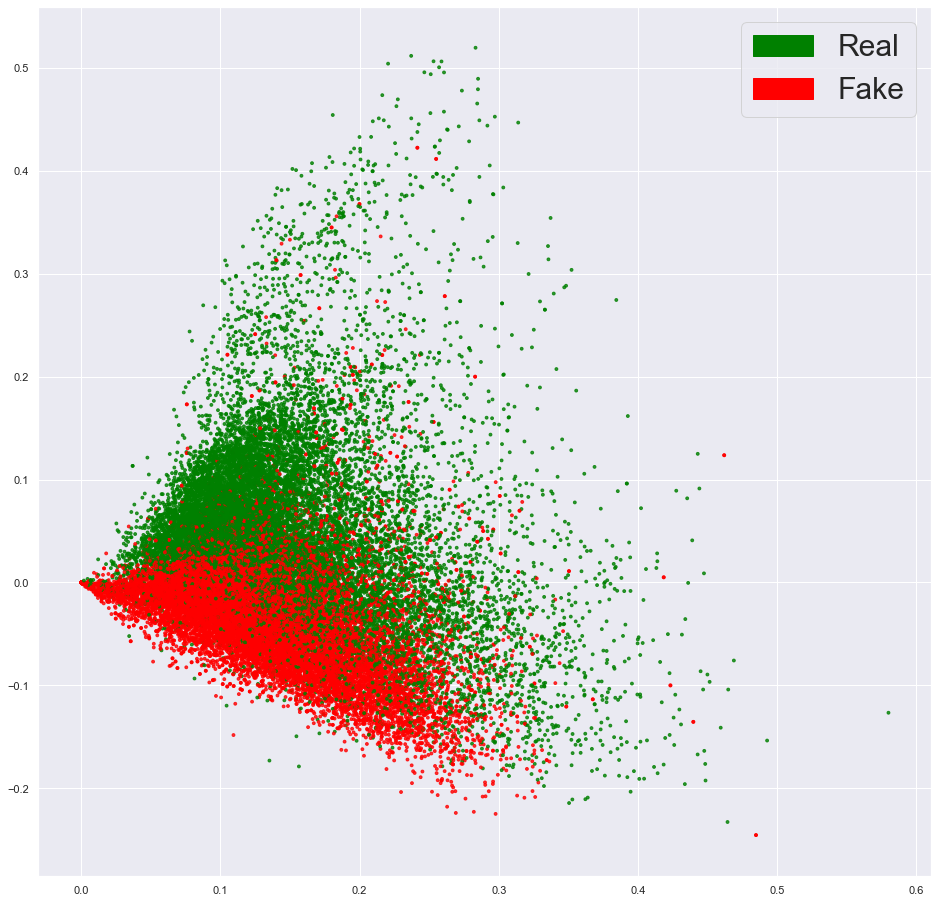

<Figure size 432x288 with 0 Axes>

In [48]:
fig = plt.figure(figsize=(16, 16))          
plot_LSA(X_train_tfidf, y_train)
plt.show()
plt.savefig('LSA_TFIDF.png')

We can see that by using the TFIDF method the model can distinguish more between the two classes

### Modelling

In [59]:
# We will use the Logistic Regression again to compare it with the previous model
clf_tfidf = LogisticRegression(C= 30, class_weight='balanced', 
                         multi_class='multinomial', n_jobs=-1, random_state=40)

clf_tfidf.fit(X_train_tfidf, y_train)

y_pred_tfidf = clf_tfidf.predict(X_test_tfidf)

In [60]:
accuracy_tfidf, precision_tfidf, recall_tfidf, f1_tfidf = get_metrics(y_test, y_pred_tfidf)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_tfidf, precision_tfidf, 
                                                                       recall_tfidf, f1_tfidf))

accuracy = 0.985, precision = 0.981, recall = 0.990, f1 = 0.985


We can see that the score improved in this model compared to the previous one.

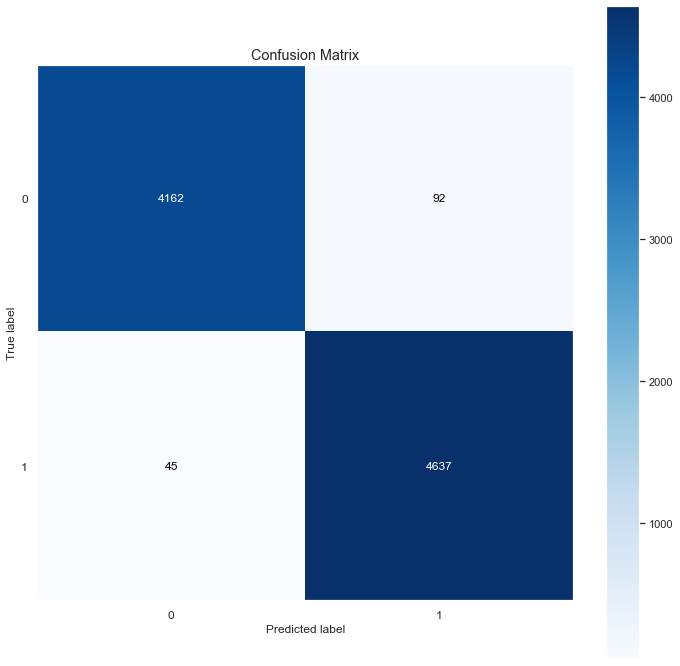

In [61]:
skplt.metrics.plot_confusion_matrix(
    y_test, 
    y_pred_tfidf,
    figsize=(12,12))

plt.savefig('Confusion Matrix2.png')

We can see that we have less FP and FN, which confirms the score that we saw earlier. Now let's check if the most relevant words for the prediction also changed:

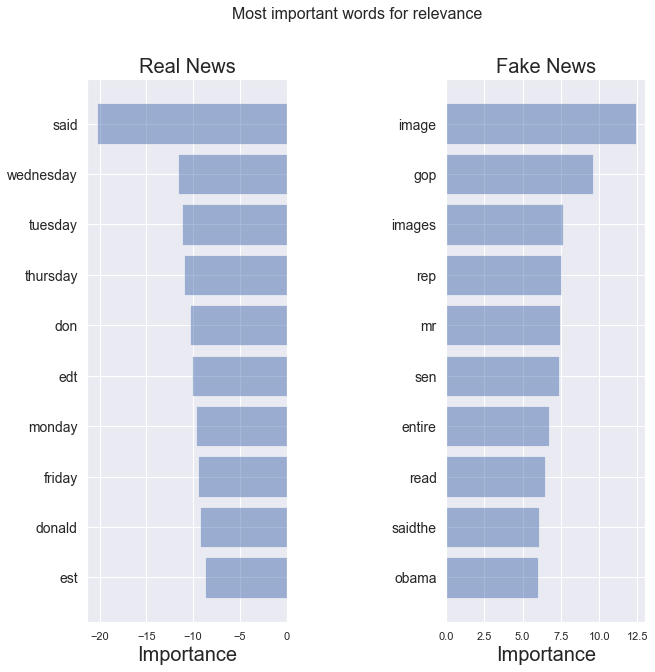

In [63]:
importance_tfidf = get_most_important_features(tfidf, clf_tfidf, 10)
top_scores = [a[0] for a in importance_tfidf[0]['tops']]
top_words = [a[1] for a in importance_tfidf[0]['tops']]
bottom_scores = [a[0] for a in importance_tfidf[0]['bottom']]
bottom_words = [a[1] for a in importance_tfidf[0]['bottom']]

plot_important_words(top_scores, top_words, bottom_scores, bottom_words, "Most important words for relevance")

We can see some changes in the ranking.

In the real news ranking, the word "said" is now the most relevant word. We also don't have any stop words like "it" and "the" anymore in the ranking, which means that the TFIDF with English stop words worked.

In the fake news ranking, "image" and "images" are now at the top, replacing the word "via" that was the most relevant in the previous model.

## BERT

Although the previous models worked well, there is still room for improvement. One thing that TF-IDF and the Bag of Words fails to analyse is the context in which the words are used. A word can have multiple meanings depending on the context, and it's not just by counting the frequency of the word that we will be able to get the real meaning.

For that reason we will now use word2vec, which is a pre-trained model that helps identify words that are sinonyms or that are related.

In [3]:
#!pip install transformers
# transformers is needed to import the BERT model

#!conda install -y pytorch torchvision cudatoolkit=10.1 -c pytorch
# pytorch needs to be installed in order to use the BERT model and not just some of its functionalities

In [1]:
from transformers import BertTokenizer, BertForSequenceClassification

Neither PyTorch nor TensorFlow >= 2.0 have been found.Models won't be available and only tokenizers, configurationand file/data utilities can be used.
